In [1]:
import qiskit

In [2]:
# check version
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
# first we will debug the code locally on simulator and then we will run on the IBM machine using its token



In [4]:
from qiskit import IBMQ

In [5]:
IBMQ.save_account('3ac70a17964072aa1cd8534afa284560c4a25f8ff126c5c1caeb70a4de10ad9beff4201d491544fd80ef48ae55eafac81ec6e710fc692af598e8ed2338a954c1', overwrite=True)

In [6]:
# check the access to ibmq device
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
# need to make 2 qubit quantum circuit
# importing everything from the qiskit
from qiskit import *

In [8]:
# building 2 qubit quantum register
qr = QuantumRegister(2)

In [9]:
# building 2 classical registers to measure the results from qubits
cr = ClassicalRegister(2)

In [10]:
# building a circuit using above registers
#circuit = QuantumCircuit(qr, cr)

circuit = QuantumCircuit(2, 2)

In [11]:
# plotting the circuit diag

# for one line
%matplotlib inline  

In [12]:
circuit.draw()

q_0: 
     
q_1: 
     
c_0: 
     
c_1:

In [13]:
# building gates into the circuit

# in order to create entanglement, we need to create Hadamard gate onto first qubit

In [14]:
# applying hadamard gate onto the first qubit
circuit.h(0)

In [15]:
!pip install pylatexenc

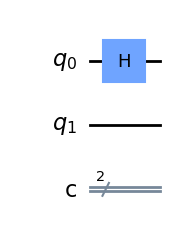

In [16]:
circuit.draw(output='mpl')

In [17]:

# using control x gate
# this 2 qubit operation is like logical if-else

# using first qubit as controller bit, and second qubit as target qubit
circuit.cx(0, 1)

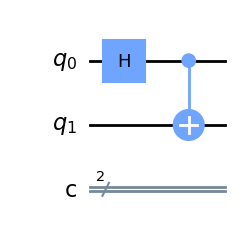

In [18]:
circuit.draw(output='mpl')

# now we have entanglement between q00 and q01

In [19]:
# measuring qubit and storing it in the bit register
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in the clasical bits [0,1] in order

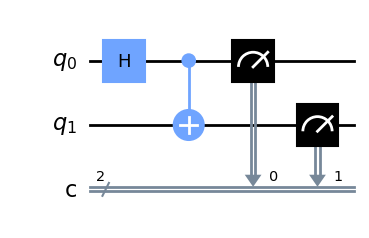

In [20]:
circuit.draw(output='mpl')

In [21]:
# running the above circuit in simulation using AER (for simulation on local computer)
simulator = Aer.get_backend('qasm_simulator') # qasm stands for quantum assembly language

In [22]:
# executing the cirucuit with the simulator as my backend
execute(circuit, backend= simulator)

In [29]:
# storing above in a result variable
result = execute(circuit, backend= simulator).result()

In [32]:
# for visualisation
from qiskit.tools.visualization import plot_histogram

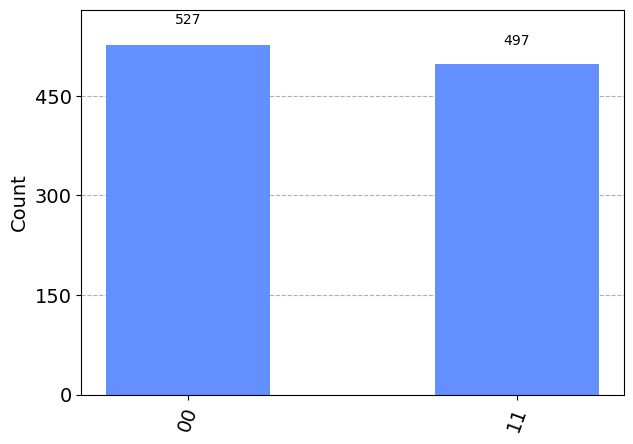

In [34]:
plot_histogram(result.get_counts(circuit))

In [35]:
# with 0.527 probability of 00 and 0.497 of 11. Error is due to limited number of shots.

In [36]:
# running my code on an actual Quantum computer

In [37]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-07 15:12:06,297: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [56]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends() # lists all the backend available


#    What is the difference between all the backends?



[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [57]:
# setting up the quantum computer 
# qcomp = provider.get_backend('ibmq_16_melbourne') # this is the name of the computer

# melbourne is retired, hence we are going to use some other provider. According to first comment (official)
# in the tutorial 

qcomp = provider.get_backend('ibmq_quito')

In [58]:
job = execute(circuit, backend=qcomp)

In [59]:
# getting the monitor to check the stats of the job
from qiskit.tools.monitor import job_monitor

In [ ]:
job_monitor(job)

In [ ]:
result = job.result()  # putting result into a variable

In [ ]:
# plots all the possibilities for 00 01 10 11 
# here we can see that, unlike simulated results where only 00 11 were there, we also get some results
# of 01 and 10. why? real quantum computer is susceptible to small quantum errors. but we are decreasing errors 
# and machines are getting better everyday.
plot_histogram(result.get_counts(circuit))